## 9.2. Long Short-Term Memory（LSTM）
### 9.2.1. Gated Memory Cell
#### 9.2.1.1. Input Gate, Forget Gate, and Output Gate
#### 9.2.1.2. Candidate Memory Cell
#### 9.2.1.3. Memory Cell
#### 9.2.1.4. Hidden State

### 9.2.2. Implementation from Scratch

In [1]:
from mxnet import np, npx
from mxnet.gluon import rnn
from d2l import mxnet as d2l

npx.set_np()

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
# 9.2.2.1. Initializing Model Parameters
def get_lstm_params(vocab_size, num_hiddens, device):
    """Initializing Model Parameters."""
    num_inputs = num_outputs = vocab_size
    normal = lambda shape: np.random.normal(scale=0.01, size=shape, ctx=device)
    zeros = lambda num_cells: np.zeros(num_cells, ctx=device)
    three = lambda: (normal((num_inputs, num_hiddens)), normal((num_hiddens, num_hiddens)), zeros(num_hiddens))

    W_xi, W_hi, b_i = three()  # Input gate parameters
    W_xf, W_hf, b_f = three()  # Forget gate parameters
    W_xo, W_ho, b_o = three()  # Output gate parameters
    W_xc, W_hc, b_c = three()  # Candidate memory cell parameters
    # Output layer parameters
    W_hq = normal((num_hiddens, num_outputs))
    b_q = zeros(num_outputs)
    # Attach gradients
    params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q]
    for param in params:
        param.attach_grad()
    return params

In [3]:
# 9.2.2.2. Defining the Model
def lstm(inputs, state, params):
    """Defining the Model."""
    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q] = params
    (H, C) = state
    outputs = []
    for X in inputs:
        I = npx.sigmoid(np.dot(X, W_xi) + np.dot(H, W_hi) + b_i)
        F = npx.sigmoid(np.dot(X, W_xf) + np.dot(H, W_hf) + b_f)
        O = npx.sigmoid(np.dot(X, W_xo) + np.dot(H, W_ho) + b_o)
        C_tilda = np.tanh(np.dot(X, W_xc) + np.dot(H, W_hc) + b_c)
        C = F * C + I * C_tilda
        H = O * np.tanh(C)
        Y = np.dot(H, W_hq) + b_q
        outputs.append(Y)
    return np.concatenate(outputs, axis=0), (H, C)

In [4]:
# 9.2.2.3 Training and Prediction
vocab_size, num_hiddens = len(vocab), 256
num_epochs, lr = 500, 1
device = d2l.try_gpu()

In [7]:
init_lstm_state = lambda batch_size, num_hiddens, device: (
    np.zeros((batch_size, num_hiddens), ctx=device),
    np.zeros((batch_size, num_hiddens), ctx=device))


perplexity 1.1, 12154.4 tokens/sec on gpu(0)
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


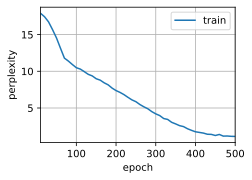

In [8]:
model = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_lstm_params, init_lstm_state, lstm)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

perplexity 1.2, 138456.5 tokens/sec on gpu(0)
time travellerit w co saig the time travellerit would be remark 
travellerthic this is mover about thating and diftron hald 


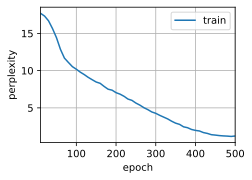

In [9]:
lstm_layer = rnn.LSTM(num_hiddens)
model = d2l.RNNModel(lstm_layer, len(vocab))
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

perplexity 1.0, 95639.0 tokens/sec on gpu(0)
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


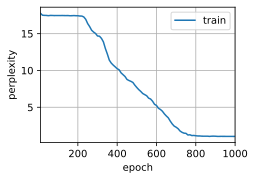

In [10]:
lstm_layer2 = rnn.LSTM(num_hiddens, num_layers=2)
model2 = d2l.RNNModel(lstm_layer2, len(vocab))
d2l.train_ch8(model2, train_iter, vocab, lr, num_epochs * 2, device)

In [13]:
d2l.predict_ch8('let it go ', 20, model2, vocab, device)

'let it go exhe time dimensions'

In [15]:
d2l.predict_ch8('let it go let it go ', 20, model2, vocab, device)

'let it go let it go e accentt yisg ar a '

In [16]:
d2l.predict_ch8('the actual model is defined just like what we discussed before ', 20, model2, vocab, device)

'the actual model is defined just like what we discussed before the time dimension w'